## 任务一，数据导入

In [1]:

import pandas as pd 

df = pd.read_csv('./data/credit.csv',index_col = 0 )
df.head() #显示前5行数据


,Target,Nation,Birth_Place,Gender,Age,Marriage_State,Highest Education,House_State,Work_Years,Title,...,ZX_Max_Overdue_Account,ZX_Link_Max_Overdue_Amount,ZX_Total_Overdu_Months,ZX_Max_Overdue_Duration,ZX_Max_Credits,ZX_Max_Credit_Banks,ZX_Max_Overdue_Credits,ZX_Credit_Max_Overdu_Amount,ZX_Credit_Total_Overdue_Months,ZX_Credit_Max_Overdue_Duration
Cust_No,,,,,,,,,,,,,,,,,,,,,
2,0,1.0,330621,1,55,40.0,71.0,1.0,0,9.0,...,1,0,2,1,1,1,0,0,0,0
4,0,1.0,330621,0,40,99.0,90.0,1.0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
6,0,1.0,330621,1,45,20.0,71.0,1.0,0,NaN,...,1,23,3,1,2,2,0,0,0,0
7,0,NaN,330421,0,32,20.0,21.0,1.0,0,NaN,...,1,1,3,1,1,1,0,0,0,0
8,0,1.0,330621,0,46,20.0,71.0,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,0


## 任务二 缺失值处理

,index,missing_rate
9,Title,0.603075
11,Industry,0.594120
7,House_State,0.424806
1,Nation,0.356877
5,Marriage_State,0.334404
6,Highest Education,0.325786
10,Duty,0.126563
25,ZX_Max_Credits,0.000000
21,ZX_Max_Overdue_Account,0.000000
22,ZX_Link_Max_Overdue_Amount,0.000000


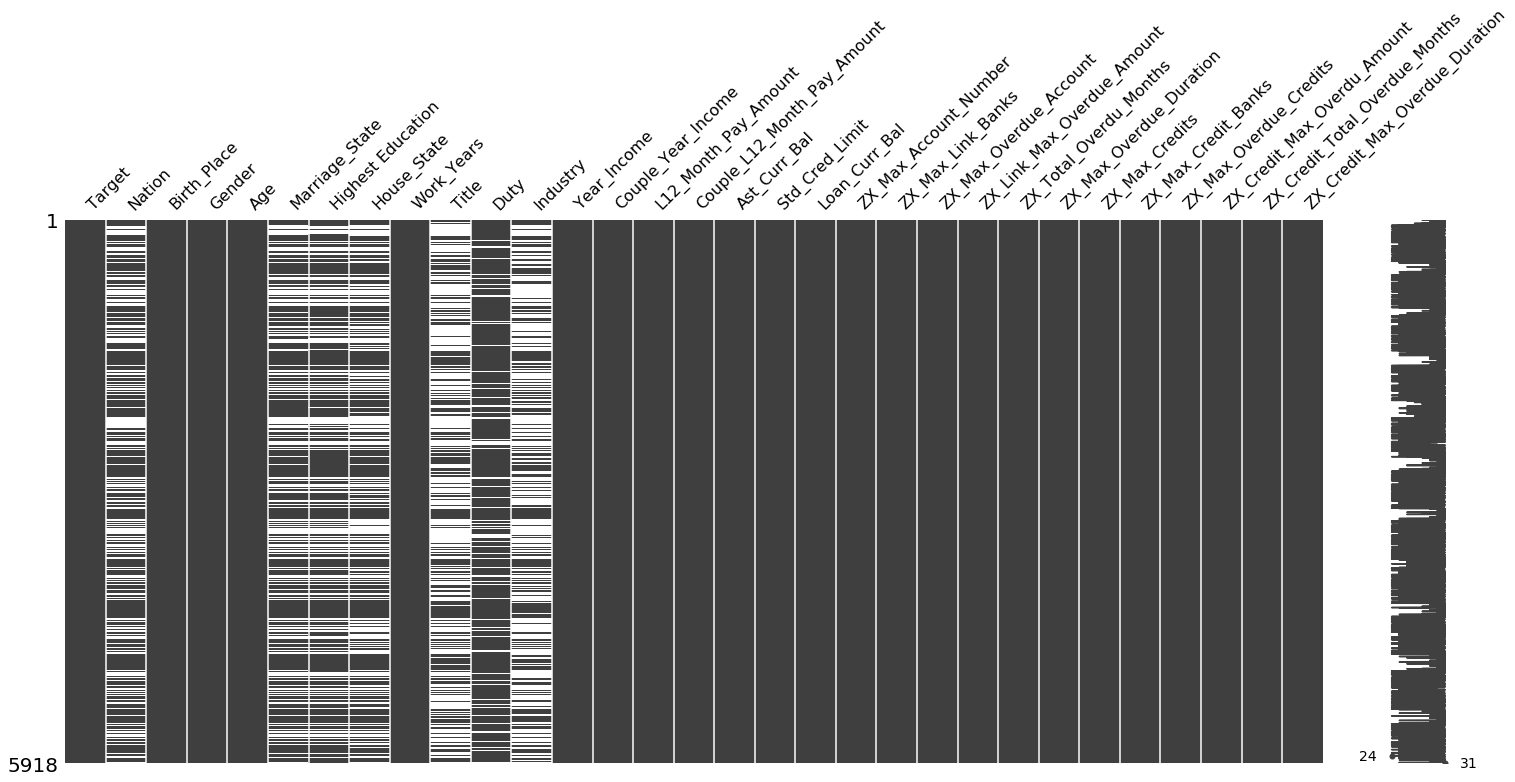

In [9]:

#步骤一 查看缺失值

#查看缺失值的分布
import missingno  #导入missingno包
missingno.matrix(df)
#查看字段中缺失值的占比
df_missing = pd.DataFrame(df.isnull().sum()/df.shape[0],columns=['missing_rate']).reset_index()
df_missing.sort_values(by='missing_rate',ascending=False)[:15]


In [37]:
#步骤二 使用众数 对缺失值 填充
#定义存在缺失值字段列表
missing_col = ['Title','Industry','House_State','Nation','Marriage_State','Highest Education','Duty'] 

#print(df["Title"].mode.__doc__)
#使用for循环处理多个字段缺失值
for col in missing_col:
    df[col]=df[col].fillna(df[col].mode().values[0])

print(df)

         Target  Nation  Birth_Place  Gender  Age  Marriage_State  \
Cust_No                                                             
2             0     1.0       330621       1   55             1.0   
4             0     1.0       330621       0   40             1.0   
6             0     1.0       330621       1   45             1.0   
7             0     1.0       330421       0   32             1.0   
8             0     1.0       330621       0   46             1.0   
...         ...     ...          ...     ...  ...             ...   
6455          0     1.0       330621       1   36             1.0   
6456          0     1.0       342423       0   41             1.0   
6458          0     1.0       330621       1   52             1.0   
6459          0     1.0       330621       0   32             1.0   
6460          0     1.0       330621       1   51             1.0   

         Highest Education  House_State  Work_Years  Title  ...  \
Cust_No                            

In [35]:
#处理完成后，查看各字段中缺失值占比：
df_missing_2 = pd.DataFrame(df.isnull().sum()/df.shape[0],columns=['missing_rate']).reset_index()
df_missing_2.sort_values(by='missing_rate',ascending=False)[:15]
print(df_missing_2)


                             index  missing_rate
0                           Target           0.0
1                           Nation           0.0
2                      Birth_Place           0.0
3                           Gender           0.0
4                              Age           0.0
5                   Marriage_State           0.0
6                Highest Education           0.0
7                      House_State           0.0
8                       Work_Years           0.0
9                            Title           0.0
10                            Duty           0.0
11                        Industry           0.0
12                     Year_Income           0.0
13              Couple_Year_Income           0.0
14            L12_Month_Pay_Amount           0.0
15     Couple_L12_Month_Pay_Amount           0.0
16                    Ast_Curr_Bal           0.0
17                  Std_Cred_Limit           0.0
18                   Loan_Curr_Bal           0.0
19           ZX_Max_

## 测试代码

In [33]:
print(pd.Series([1,1,2,2,2]).mode())
print(pd.Series([1,1,2,2,2]).mode().values[0])

0    2
dtype: int64
2
